In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data
import datetime
import seaborn as sns
# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False


In [2]:
# 데이터를 가져온다
blood_place = pd.read_csv('blood data/장소별_헌혈통계_2005_2019 (2).csv', encoding = 'CP949', header=None)
blood_place

,0,1,2,3,4,5,6,7,8,9,...,308,309,310,311,312,313,314,315,316,317
0,혈액원별(1),혈액원별(2),성별(1),2005,2005,2005,2005,2005,2005,2005,...,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019
1,혈액원별(1),혈액원별(2),성별(1),합계,단체헌혈,단체헌혈,단체헌혈,단체헌혈,단체헌혈,단체헌혈,...,단체헌혈,단체헌혈,개인헌혈,개인헌혈,개인헌혈,개인헌혈,개인헌혈,개인헌혈,개인헌혈,개인헌혈
2,혈액원별(1),혈액원별(2),성별(1),소계,소계,소계,고등학교,고등학교,대학교,대학교,...,일반단체,일반단체,소계,소계,원내,원내,헌혈의집,헌혈의집,가두,가두
3,혈액원별(1),혈액원별(2),성별(1),실적 (건),실적 (건),구성비 (%),실적 (건),구성비 (%),실적 (건),구성비 (%),...,실적 (건),구성비 (%),실적 (건),구성비 (%),실적 (건),구성비 (%),실적 (건),구성비 (%),실적 (건),구성비 (%)
4,합계,소계,계,2274336,1209466,53.2,293838,12.9,101838,4.5,...,156537,5.6,1917840,68.7,41909,1.5,1870399,67.0,5532,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,대한적십자사,제주,남,24968,17439,69.9,3405,13.6,1104,4.4,...,2374,9.6,14824,60.1,1433,5.8,13391,54.3,0,0.0
57,대한적십자사,제주,여,6706,2647,39.5,1286,19.2,778,11.6,...,1012,8.9,6690,59.1,372,3.3,6318,55.8,0,0.0
58,대한적십자사 외,소계,계,50700,0,0.0,0,0.0,0,0.0,...,11102,6.3,152167,85.9,2419,1.4,146618,82.7,3130,1.8
59,대한적십자사 외,소계,남,42088,0,0.0,0,0.0,0,0.0,...,8939,7.0,108333,85.1,1580,1.2,104577,82.1,2176,1.7


In [52]:
## 고등학교
blood_high  = blood_place.T[blood_place.T[2].str.contains('고등학교|혈액|성별')].drop(columns = [4,5,6,58,59,60])
# 2008년 데이터부터 사용
blood_high2 = blood_high.drop(index=0)[[0,3,7]][8:]
# 실적건수만 비교
blood_high3 = blood_high2[blood_high2[3].str.contains('실적')]
blood_high3 = blood_high3.drop(columns=3).astype(int)
blood_high3 = blood_high3.set_index(0)
blood_high3.columns = ['고등학교 년도별 실적비교']
blood_high3

,고등학교 년도별 실적비교
0,
2008,337228
2009,284924
2010,355296
2011,350917
2012,354586
2013,365062
2014,362898
2015,330823
2016,352432


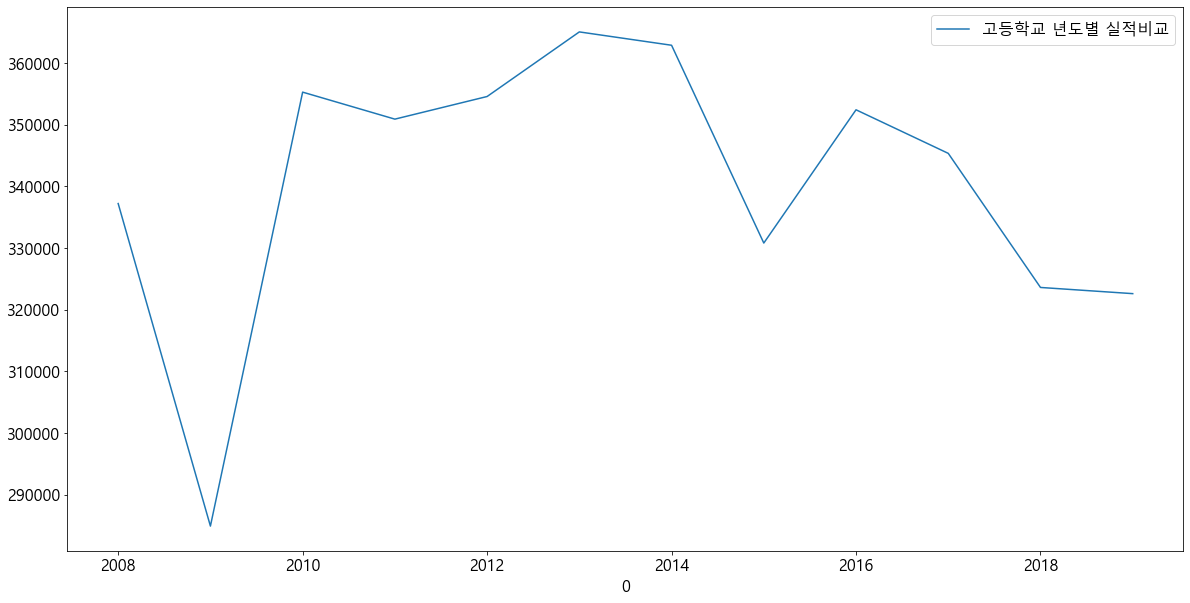

In [53]:
blood_high3.plot()
plt.show()

In [54]:
## 고등학교
blood_high  = blood_place.T[blood_place.T[2].str.contains('고등학교|혈액|성별')].drop(columns = [4,5,6,58,59,60])
# 2008년 데이터부터 사용
blood_high2 = blood_high.drop(index=0)[[0,3,7]][8:]
# 구성비만 비교
blood_high_ratio = blood_high2[blood_high2[3].str.contains('구성비')]
blood_high_ratio = blood_high_ratio.drop(columns=3).astype(float)
blood_high_ratio = blood_high_ratio.set_index(0)
blood_high_ratio.columns = ['고등학교 년도별 구성비비교']
blood_high_ratio

,고등학교 년도별 구성비비교
0,
2008.0,14.9
2009.0,11.6
2010.0,14.1
2011.0,14.3
2012.0,13.9
2013.0,13.5
2014.0,12.8
2015.0,11.5
2016.0,13.3


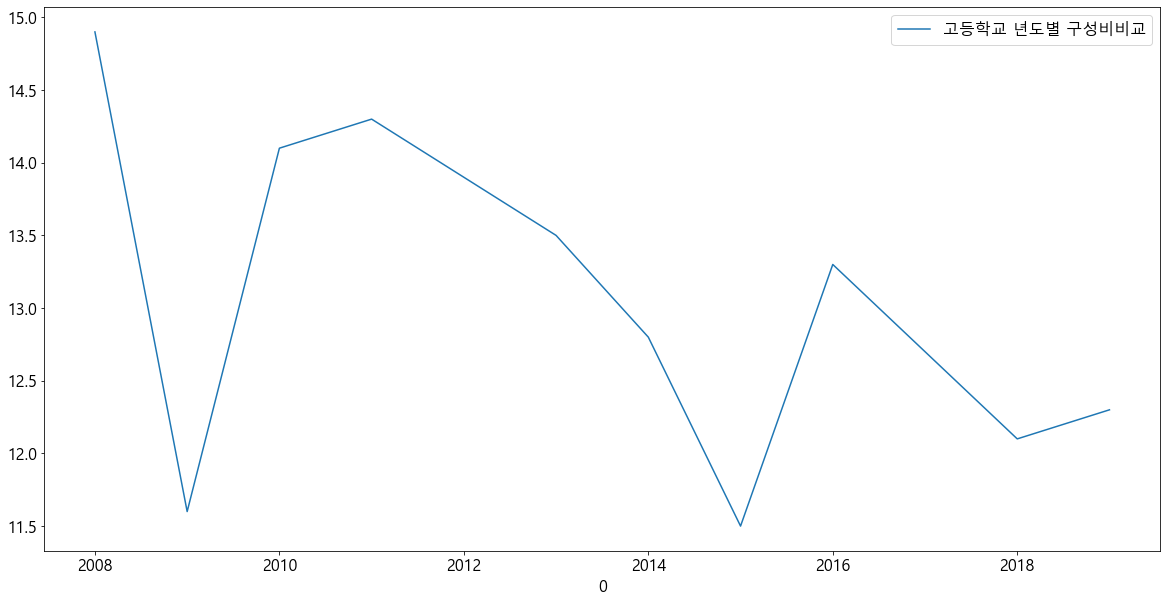

In [56]:
blood_high_ratio.plot()
plt.show()

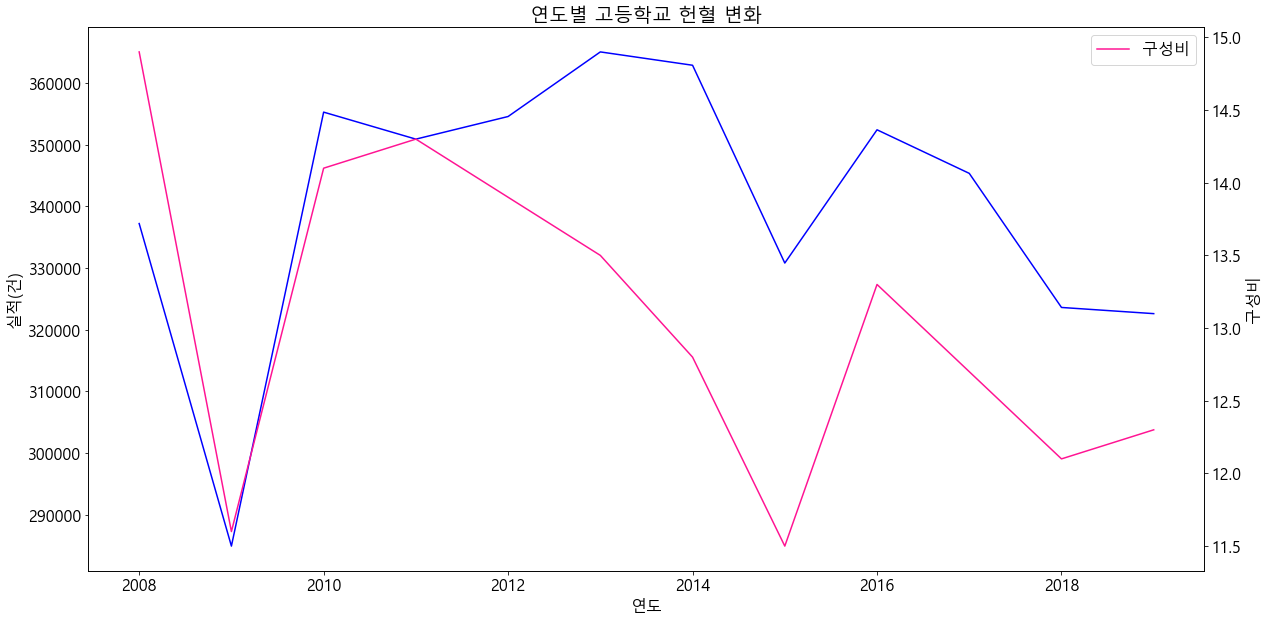

In [77]:
x= blood_high3.index

# 실적비교 
fig, ax1 = plt.subplots()
ax1.plot(x, blood_high3, color='blue', label= '실적')
ax1.set_xlabel('연도')
ax1.set_ylabel('실적(건)')

# 구성비비교 
ax2 = ax1.twinx()
ax2.plot(x, blood_high_ratio, color='deeppink',label= '구성비')
ax2.set_ylabel('구성비')
ax2.legend(loc='lower right')

plt.title('연도별 고등학교 헌혈 변화')
plt.legend()
plt.show()

In [80]:
## 대학교 실적
blood_uni  = blood_place.T[blood_place.T[2].str.contains('대학교|혈액|성별')].drop(columns = [4,5,6,58,59,60])
# 2008년 데이터부터 사용
blood_uni2 = blood_uni.drop(index=0)[[0,3,7]][8:]
# 실적건수만 비교
blood_uni3 = blood_uni2[blood_uni2[3].str.contains('실적')]
blood_uni3 = blood_uni3.drop(columns=3).astype(int)
blood_uni3 = blood_uni3.set_index(0)
blood_uni3.columns = ['대학교 년도별 실적비교']


## 대학교 구성비
# 구성비만 비교
blood_uni_ratio = blood_uni2[blood_uni2[3].str.contains('구성비')]
blood_uni_ratio = blood_uni_ratio.drop(columns=3).astype(float)
blood_uni_ratio = blood_uni_ratio.set_index(0)
blood_uni_ratio.columns = ['대학교 년도별 구성비비교']

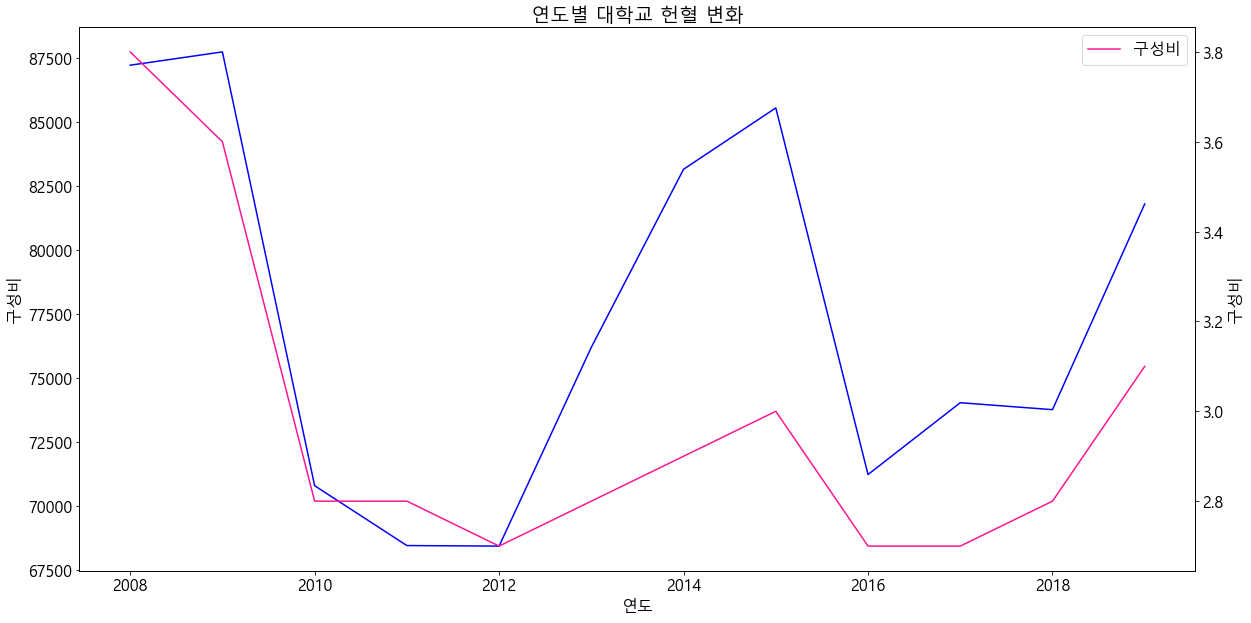

In [81]:
x= blood_uni3.index

# 실적비교 
fig, ax1 = plt.subplots()
ax1.plot(x, blood_uni3, color='blue', label= '실적')
ax1.set_xlabel('연도')
ax1.set_ylabel('구성비')

# 구성비비교 
ax2 = ax1.twinx()
ax2.plot(x, blood_uni_ratio, color='deeppink',label= '구성비')
ax2.set_ylabel('구성비')
ax2.legend(loc='lower right')

plt.title('연도별 대학교 헌혈 변화')
plt.legend()
plt.show()

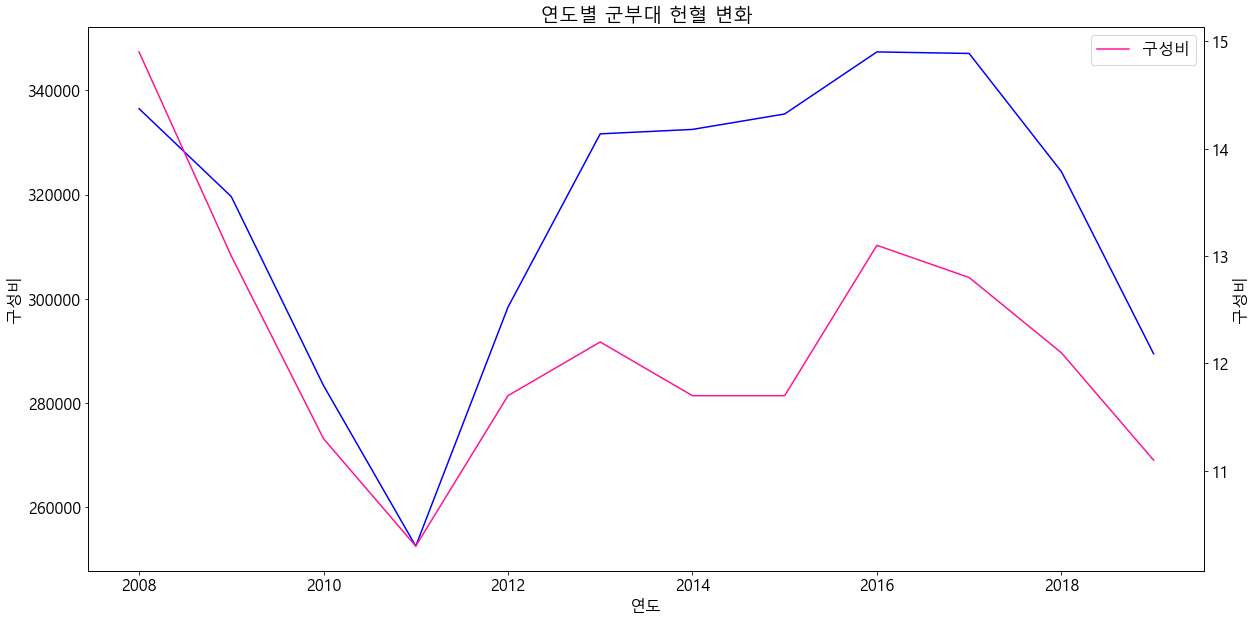

In [84]:
## 군부대 실적
blood_army  = blood_place.T[blood_place.T[2].str.contains('군부대|혈액|성별')].drop(columns = [4,5,6,58,59,60])
# 2008년 데이터부터 사용
blood_army2 = blood_army.drop(index=0)[[0,3,7]][8:]
# 실적건수만 비교
blood_army3 = blood_army2[blood_army2[3].str.contains('실적')]
blood_army3 = blood_army3.drop(columns=3).astype(int)
blood_army3 = blood_army3.set_index(0)
blood_army3.columns = ['군부대 년도별 실적비교']


## 대학교 구성비
# 구성비만 비교
blood_army_ratio = blood_army2[blood_army2[3].str.contains('구성비')]
blood_army_ratio = blood_army_ratio.drop(columns=3).astype(float)
blood_army_ratio = blood_army_ratio.set_index(0)
blood_army_ratio.columns = ['군부대 년도별 구성비비교']

x= blood_army3.index

# 실적비교 
fig, ax1 = plt.subplots()
ax1.plot(x, blood_army3, color='blue', label= '실적')
ax1.set_xlabel('연도')
ax1.set_ylabel('구성비')

# 구성비비교 
ax2 = ax1.twinx()
ax2.plot(x, blood_army_ratio, color='deeppink',label= '구성비')
ax2.set_ylabel('구성비')
ax2.legend(loc='lower right')

plt.title('연도별 군부대 헌혈 변화')
plt.legend()
plt.show()

In [87]:
# 데이터를 가져온다
blood_place.T

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,혈액원별(1),혈액원별(1),혈액원별(1),혈액원별(1),합계,합계,합계,대한적십자사,대한적십자사,대한적십자사,...,대한적십자사,대한적십자사,대한적십자사,대한적십자사,대한적십자사,대한적십자사,대한적십자사,대한적십자사 외,대한적십자사 외,대한적십자사 외
1,혈액원별(2),혈액원별(2),혈액원별(2),혈액원별(2),소계,소계,소계,소계,소계,소계,...,광주전남,경남,경남,경남,제주,제주,제주,소계,소계,소계
2,성별(1),성별(1),성별(1),성별(1),계,남,여,계,남,여,...,여,계,남,여,계,남,여,계,남,여
3,2005,합계,소계,실적 (건),2274336,1831613,442723,2223636,1789525,434111,...,42300,100563,88225,12338,31674,24968,6706,50700,42088,8612
4,2005,단체헌혈,소계,실적 (건),1209466,1076221,133245,1209466,1076221,133245,...,18382,68501,63824,4677,20086,17439,2647,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313,2019,개인헌혈,원내,구성비 (%),1.5,1.6,1.3,1.5,1.6,1.2,...,0.1,0.8,0.8,0.8,5.0,5.8,3.3,1.4,1.2,1.7
314,2019,개인헌혈,헌혈의집,실적 (건),1870399,1314974,555425,1723781,1210397,513384,...,45434,70878,52525,18353,19709,13391,6318,146618,104577,42041
315,2019,개인헌혈,헌혈의집,구성비 (%),67.0,64.6,73.6,65.9,63.4,72.9,...,70.0,53.3,51.8,58.1,54.8,54.3,55.8,82.7,82.1,84.3
316,2019,개인헌혈,가두,실적 (건),5532,3988,1544,2402,1812,590,...,0,1434,1070,364,0,0,0,3130,2176,954


In [91]:
blood_place2 = blood_place.T
blood_place2

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,혈액원별(1),혈액원별(1),혈액원별(1),혈액원별(1),합계,합계,합계,대한적십자사,대한적십자사,대한적십자사,...,대한적십자사,대한적십자사,대한적십자사,대한적십자사,대한적십자사,대한적십자사,대한적십자사,대한적십자사 외,대한적십자사 외,대한적십자사 외
1,혈액원별(2),혈액원별(2),혈액원별(2),혈액원별(2),소계,소계,소계,소계,소계,소계,...,광주전남,경남,경남,경남,제주,제주,제주,소계,소계,소계
2,성별(1),성별(1),성별(1),성별(1),계,남,여,계,남,여,...,여,계,남,여,계,남,여,계,남,여
3,2005,합계,소계,실적 (건),2274336,1831613,442723,2223636,1789525,434111,...,42300,100563,88225,12338,31674,24968,6706,50700,42088,8612
4,2005,단체헌혈,소계,실적 (건),1209466,1076221,133245,1209466,1076221,133245,...,18382,68501,63824,4677,20086,17439,2647,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313,2019,개인헌혈,원내,구성비 (%),1.5,1.6,1.3,1.5,1.6,1.2,...,0.1,0.8,0.8,0.8,5.0,5.8,3.3,1.4,1.2,1.7
314,2019,개인헌혈,헌혈의집,실적 (건),1870399,1314974,555425,1723781,1210397,513384,...,45434,70878,52525,18353,19709,13391,6318,146618,104577,42041
315,2019,개인헌혈,헌혈의집,구성비 (%),67.0,64.6,73.6,65.9,63.4,72.9,...,70.0,53.3,51.8,58.1,54.8,54.3,55.8,82.7,82.1,84.3
316,2019,개인헌혈,가두,실적 (건),5532,3988,1544,2402,1812,590,...,0,1434,1070,364,0,0,0,3130,2176,954
